# **KnaPsack**

In [3]:
!pip install mlrose-hiive

In [4]:
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt
import time

In [16]:
len = 200
attempts = 10
iters = 100
restarts = 10
schedule = mlrose_hiive.GeomDecay(init_temp=1, decay=0.095, min_temp=0.1)
weight = np.random.uniform(0,10,len)
value = np.random.uniform(0,10,len)
max_weight = 100
problem = mlrose_hiive.KnapsackOpt(weights=weight, values=value, max_weight_pct=max_weight)

# **Random Hill Climb**

In [12]:
start_time = time.time()
rhc_best_state, rhc_best_fitness, rhc_best_curve = mlrose_hiive.random_hill_climb(problem, max_attempts=attempts, max_iters=iters, init_state=None, curve=True, random_state=None, restarts=restarts)
print("--- %s RHC seconds ---" % (time.time() - start_time))

--- 0.08844470977783203 RHC seconds ---


# **Simulated Annealing**

In [7]:
start_time = time.time()
sa_best_state, sa_best_fitness, sa_best_curve = mlrose_hiive.simulated_annealing(problem, schedule=schedule, max_attempts=attempts, max_iters=iters, init_state=None, curve=True, random_state=None)
print("--- %s SA seconds ---" % (time.time() - start_time))

--- 0.014265060424804688 SA seconds ---


# **Genetic Alg**

In [8]:
start_time = time.time()
ga_best_state, ga_best_fitness, ga_best_curve = mlrose_hiive.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=attempts, max_iters=iters, curve=True, random_state=None)
print("--- %s GA seconds ---" % (time.time() - start_time))

--- 1.7704148292541504 GA seconds ---


# **MIMIC**

In [9]:
start_time = time.time()
mimic_best_state, mimic_best_fitness, mimic_best_curve = mlrose_hiive.mimic(problem, pop_size=500, keep_pct=0.2, max_attempts=attempts, max_iters=iters, curve=True, random_state=None)
print("--- %s MIMIC seconds ---" % (time.time() - start_time))

--- 710.0618488788605 MIMIC seconds ---


# **Curves**

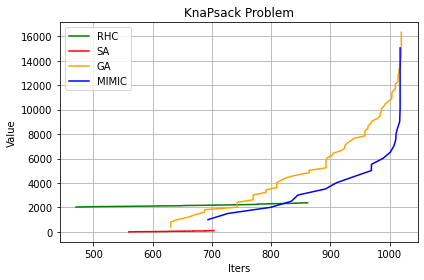

In [17]:
plt.grid()
rhc_x = [x[0] for x in rhc_best_curve]
rhc_y = [x[1] for x in rhc_best_curve]
sa_x = [x[0] for x in sa_best_curve]
sa_y = [x[1] for x in sa_best_curve]
ga_x = [x[0] for x in ga_best_curve]
ga_y = [x[1] for x in ga_best_curve]
mimic_x = [x[0] for x in mimic_best_curve]
mimic_y = [x[1] for x in mimic_best_curve]
plt.plot(rhc_x, rhc_y,color='green', label="RHC")
plt.plot(sa_x, sa_y, color='red', label="SA")
plt.plot(ga_x, ga_y, color='orange', label="GA")
plt.plot(mimic_x, mimic_y, color='blue', label="MIMIC")
plt.xlabel("Iters"), plt.ylabel("Value"), plt.legend(loc="best"), plt.title("KnaPsack Problem")
plt.tight_layout()
plt.show()